In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


#  coefficient quantization matrix
# quantization = [[5, 5, 5, 5, 5, 5, 5, 5],
#                 [5, 5, 5, 5, 5, 5, 5, 5],
#                 [5, 5, 5, 5, 5, 5, 5, 5],
#                 [5, 5, 5, 5, 5, 5, 5, 5],
#                 [5, 5, 5, 5, 5, 5, 5, 5],
#                 [5, 5, 5, 5, 5, 5, 5, 5],
#                 [5, 5, 5, 5, 5, 5, 5, 5],
#                 [5, 5, 5, 5, 5, 5, 5, 5]]

quantization = [[16, 11, 10, 16, 24, 40, 51, 61],
                [12, 12, 14, 19, 26, 58, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [68, 56, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99]]



# Forward DCT (8 × 8）
# The image need to be divided into 8×8 blocks firstly, and then transform each image subblock into DCT domain.
# For each image subblock in DCT domain, the coefficient in the location (0, 0) is the DC coefficient, others are AC coefficients.

def dct(img):
    img_data = img.astype(float)
    m, n = img_data.shape
    img_dct = np.zeros(img.shape)
    x_batchsize = int(m/8)
    y_batchsize = int(n/8)
    print ('m = ', m)
    print ('n = ', n)
    print (x_batchsize)
    print (y_batchsize)
    
    lis_dct = []
    x = 0
    F = 0
    lis_F = []
    TF = 0
    lis_selected = []

    for i in range(0,x_batchsize):
        for j in range(0,y_batchsize):
            window_x_s = i * 8
            window_x = (i+1) * 8
            window_y_s = j * 8
            window_y = (j+1) * 8
            img_dct[window_x_s:window_x, window_y_s:window_y] = cv2.dct(img_data[window_x_s:window_x,window_y_s:window_y]) / quantization
            lis_dct = cv2.dct(img_data[window_x_s:window_x,window_y_s:window_y]) / quantization
            y = 0
            sum_coeff = 0
            for l in lis_dct:
                for k in l:
                    if y == 0:
                        y += 1
                        continue
                    else:
                        y += 1
                        sum_coeff += (k * k)
#             print ('sum_coeff = ', sum_coeff)
            F = sum_coeff/64
            # Indexes of selected blocks inserted in a list, useful while traversing later
            if F < TF:
                lis_selected.append((i, j))
            lis_F.append(F)
            if x < 5:
                print (F)
                x += 1
#                 print ('y = ', y)

#             if x < 1:
#                 print (img_data[window_x_s:window_x,window_y_s:window_y])
#                 print (cv2.dct(img_data[window_x_s:window_x,window_y_s:window_y]) / quantization)
#                 x = x + 1
    print (lis_F)
    return img_dct


m =  2100
n =  1179
262
147
10.42598811457735
11.529626081277717
0.04956694153293922
0.056487619937162156
0.1363697787481864
[10.42598811457735, 11.529626081277717, 0.04956694153293922, 0.056487619937162156, 0.1363697787481864, 0.1724640429025279, 16.540232608284548, 12.526668999474461, 3.492718943511609, 8.709965214020189, 0.48723289835648725, 0.0, 10.273559812121402, 0.11890304868666639, 0.19577252985422733, 5.894218207278937, 5.773905053270354, 12.32818427260164, 3.630171328945796, 10.752363302913594, 0.2549798341972969, 0.3569675580972726, 0.07235945082822105, 0.0334439160038081, 0.06398989995566787, 0.11813525057122225, 0.12284903235899587, 0.08040499242687509, 0.08071384655694867, 1.100225156323476, 0.2793778640733192, 0.09825132705112909, 0.12930735926863665, 3.0248768491922946, 4.438053908678187, 8.662462111899044, 7.1198114672442925, 0.29810382815204334, 12.194427783501249, 5.684782091016268, 7.231298335111905, 1.1948038739995657, 2.353429489760198, 0.13971030125628237, 0.1956

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

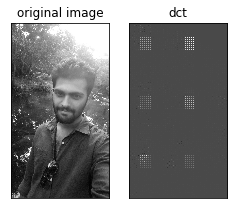

In [2]:
img = cv2.imread('github.jpeg', 0)

# DCT
img_dct = dct(img)
# print (img_dct[0][0], img_dct[0][1])
# print (img_dct[0][8], img_dct[0][9])
# print (img_dct[0][16], img_dct[0][17])
# print (img_dct[0][24], img_dct[0][25])
# print (img_dct.shape)


# m, n = img_data.shape
# img_dct = np.zeros(img.shape)
# x_batchsize = int(m/8)
# y_batchsize = int(n/8)

# for i in range(0,x_batchsize):
#     for j in range(0,y_batchsize):
#         window_x_s = i * 8
#         window_x = (i+1) * 8
#         window_y_s = j * 8
#         window_y = (j+1) * 8
        

plt.subplot(131)
plt.imshow(img, 'gray')
plt.title('original image')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(img_dct, 'gray')
plt.title('dct')
plt.xticks([]), plt.yticks([])